In [334]:
import pandas as pd

df = pd.read_csv('./fin_data.csv')
df

,age,money,gender,product,salary
0,59,3045900000,0,01020400620001;01012000200000000003;1052100100...,156000000
1,56,58500000,0,01030500560002;01030500510002;WR0001B,1341000000
2,41,1651000000,1,21001236,139000000
3,55,3218800000,1,10-047-1387-0001;220002701;TD11330032000,846000000
4,54,239200000,1,1.05E+16,1325000000
...,...,...,...,...,...
8195,33,1300000,1,10-01-20-024-0059-0000;01030500510002;TD113000...,1072000000
8196,39,952900000,1,10-003-1381-0001,344000000
8197,32,37700000,1,200000303;200000301;10-01-20-024-0059-0000;WR0...,789000000
8198,43,0,0,200000303,1139000000


C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

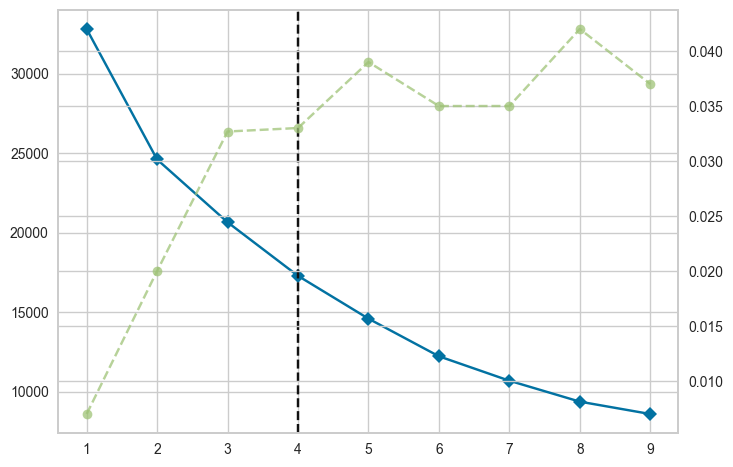

In [335]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

x = df.drop(['product'], axis=1).values
y = df['product'].values

x = StandardScaler().fit_transform(x)
df_scaled = x

features = ['age', 'money', 'gender', 'salary']
pd.DataFrame(x, columns=features).head()

# from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_scaled)

# 데이터 프레임으로 자료형 변환 및 target class 정보 추가
# df_scaled = pd.DataFrame(df_scaled, columns=features)
# data = df_scaled
# from sklearn.cluster import KMeans

# k = 4

# # 그룹 수, random_state 설정
# model = KMeans(n_clusters = k, random_state = 10)

# # 정규화된 데이터에 학습
# model.fit(df_scaled)

# # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# df_scaled['cluster'] = model.fit_predict(df_scaled)

In [309]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 4)
pca_array = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns = [f"pca{num+1}" for num in range(data.shape[1])])

result = pd.DataFrame({'고윳값':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,1.115304,0.278792,0.278792
pca2,1.004408,0.251071,0.529863
pca3,0.995169,0.248762,0.778625
pca4,0.885606,0.221375,1.000000


In [312]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 3)
# pca.fit(df_scaled.iloc[:,:-1])
 
# # pca transform 후 데이터프레임으로 자료형 변경
# df_pca = pca.transform(df_scaled.iloc[:,:-1])
# df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])

printcipalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', 'principal component3'])

# df_pca
principalDf.head()

,principal component1,principal component2,principal component3
0,1.175236,-0.153335,1.644925
1,0.337259,1.720571,-0.308023
2,0.046510,-1.713039,0.305357
3,0.981157,-0.465436,-0.885795
4,0.367807,0.271415,-1.684707


In [313]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.2787919  0.25107149 0.248762  ]


0.7786253837507626

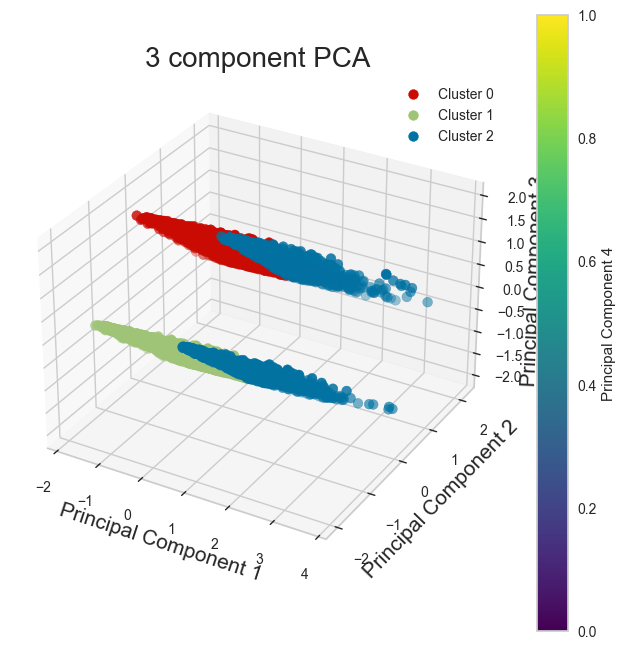

In [316]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

finalDf = pd.concat([principalDf, df_scaled[['cluster']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1'],
               finalDf.loc[indicesToKeep, 'principal component2'],
               finalDf.loc[indicesToKeep, 'principal component3'],
               c=color,
               label=f'Cluster {target}',
               s=50)

# Add colorbar for the fourth principal component
sc = ax.scatter([], [], [], c=[], cmap='viridis', s=0)
plt.colorbar(sc, label='Principal Component 4')

ax.legend()
ax.grid()
plt.show()

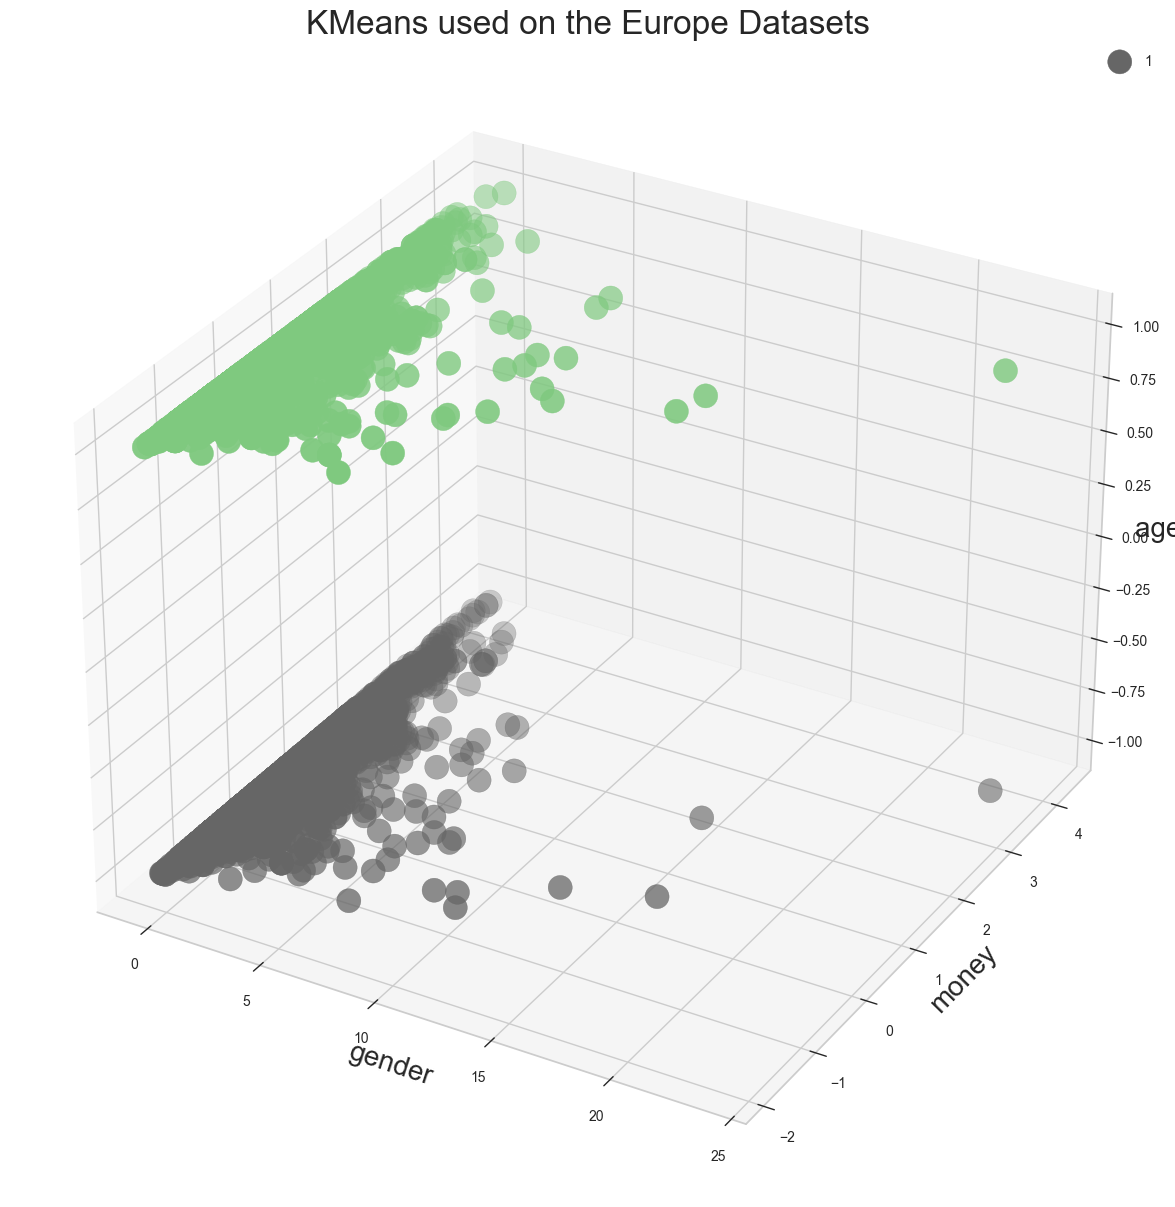

In [333]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

scaler = StandardScaler()
df=scaler.fit_transform(df)
df = pd.DataFrame(df, columns=features)

kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
maxvars=3
kmin=2
kmax=8

cols = list(df.columns)
results_for_each_k = []
vars_for_each_k = {}

for k in range(kmin, kmax+1):
    selected_variables = []
    while len(selected_variables) < maxvars:
        results = []
        for col in cols:
            scols = []
            scols.extend(selected_variables)
            scols.append(col) 
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(df[scols])
            results.append(silhouette_score(df[scols], kmeans.predict(df[scols])))
        if results:
            selected_var = cols[np.argmax(results)]
            selected_variables.append(selected_var)
            cols.remove(selected_var)
        else:
            # Handle the case when results is empty
            break

    if results:
        results_for_each_k.append(max(results))
        vars_for_each_k[k] = selected_variables

best_k = np.argmax(results_for_each_k) + kmin
selected_variables = vars_for_each_k[best_k]
kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(df[selected_variables])
clusters=kmeans.predict(df[selected_variables])

%matplotlib inline

fig = plt.figure(figsize=(15,15))
#plt.rcParams['font.size'] = 22
ax = plt.axes(projection="3d")
z_points = df[selected_variables[0]]
x_points = df[selected_variables[1]]
y_points = df[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points, c=clusters,cmap='Accent',s=300);

ax.set_xlabel(selected_variables[0],fontsize = 20)
ax.set_ylabel(selected_variables[1],fontsize = 20)
ax.set_zlabel(selected_variables[2],fontsize = 20)
ax.legend(clusters)

plt.title('KMeans used on the Europe Datasets',fontsize = 24)
plt.show()